# Correlation between BSS trips and COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and prepare covid data

In [2]:
data_folder = '../data/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/data.csv')
covid_data

,date,new_cases_ma,new_deaths_ma
0,2020-03-06,2.0,NaN
1,2020-03-07,2.0,NaN
2,2020-03-08,3.0,NaN
3,2020-03-09,3.0,NaN
4,2020-03-10,4.0,NaN
...,...,...,...
889,2022-08-12,21952.0,214.0
890,2022-08-13,19565.0,188.0
891,2022-08-14,18537.0,180.0
892,2022-08-15,20351.0,199.0


In [3]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [4]:
covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)
covid_data.head()

,new_cases_ma,new_deaths_ma
date,,
2020-03-06,2.0,NaN
2020-03-07,2.0,NaN
2020-03-08,3.0,NaN
2020-03-09,3.0,NaN
2020-03-10,4.0,NaN


## Prepare trips data

In [5]:
without_outliers = False

In [6]:
data_folder = '../data/'

if without_outliers:
    source_folder_path =  data_folder + 'trips/analysis/remove_outliers/'
else:
    source_folder_path = data_folder + 'trips/analysis/'

destination_folder_path = data_folder + 'charts/covid/'

In [7]:
data_folder = '../data/'
trips = pd.read_csv(data_folder + 'trips/analysis/trips_grouped_by_day.csv')
trips.head()

,date,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
0,2018-01-26,1,114.000000,15.000000,NaN,NaN,4.0,0.0,0.0
1,2018-01-27,8,2263.250000,14.250000,NaN,787.000000,5.0,1.0,0.0
2,2018-01-28,12,7208.666667,14.833333,NaN,1135.300000,6.0,1.0,0.0
3,2018-01-29,8,5821.875000,15.500000,NaN,195.500000,0.0,0.0,0.0
4,2018-01-30,69,3208.202899,16.144928,NaN,1248.483333,1.0,0.0,0.0


In [8]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [9]:
trips = dp.transform_to_datetime(trips, ['date'])

In [10]:
trips = dp.transform_to_time_series(trips, 'date', drop = True)

In [11]:
trips

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
date,,,,,,,,
2018-01-26,1,114.000000,15.000000,NaN,NaN,4.0,0.0,0.0
2018-01-27,8,2263.250000,14.250000,NaN,787.000000,5.0,1.0,0.0
2018-01-28,12,7208.666667,14.833333,NaN,1135.300000,6.0,1.0,0.0
2018-01-29,8,5821.875000,15.500000,NaN,195.500000,0.0,0.0,0.0
2018-01-30,69,3208.202899,16.144928,NaN,1248.483333,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-04-26,7014,2645.781152,13.606929,31.908143,2433.724705,1.0,0.0,0.0
2022-04-27,7322,2684.503688,13.571019,31.709845,2404.509035,2.0,0.0,0.0
2022-04-28,7192,2778.109844,13.484705,31.698189,2390.592556,3.0,0.0,0.0


## Merge COVID and trip data

In [12]:
trips_and_covid = pd.merge(trips, covid_data, left_index=True, right_index=True)
trips_and_covid

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,
2020-03-06,14146,1514.422946,14.146402,29.890512,2263.046750,4.0,0.0,0.0,2.0,NaN
2020-03-07,8353,1871.476835,14.388483,29.493464,2042.197044,5.0,1.0,0.0,2.0,NaN
2020-03-08,6319,2132.284697,13.870074,30.409720,2031.644279,6.0,1.0,0.0,3.0,NaN
2020-03-09,12827,1298.145942,14.137756,30.512837,2356.093674,0.0,0.0,0.0,3.0,NaN
2020-03-10,14005,1318.363370,13.970225,30.144822,2352.754530,1.0,0.0,0.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-26,7014,2645.781152,13.606929,31.908143,2433.724705,1.0,0.0,0.0,14692.0,102.0
2022-04-27,7322,2684.503688,13.571019,31.709845,2404.509035,2.0,0.0,0.0,12434.0,99.0
2022-04-28,7192,2778.109844,13.484705,31.698189,2390.592556,3.0,0.0,0.0,12613.0,102.0


In [13]:
trips_and_covid['age'].first_valid_index()

Timestamp('2020-03-06 00:00:00')

In [14]:
trips_and_covid = trips_and_covid.rename({'distance_in_meters_bicycle':'distance'}, axis = 1)

## Correlation

In [15]:
def plot_all_correlations(data):
    # get the data correlation matrix
    corr = data.corr()
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

def plot_target_variable_correlation(data, corr, target_variable, without_outliers = False):
    correlation = np.array(corr[target_variable])
    # remove correlation with itself
    correlation = np.delete(correlation, np.where(correlation == 1))
    columns = np.array(data.keys())
    columns =  np.delete(columns, np.where(columns == target_variable))
    plt.figure(figsize=(15, 7))
    plt.bar(columns, correlation)
    for i in range(len(correlation)):
        if correlation[i] > 0:
            va="bottom"
        else:
            va="top"
        plt.text(i, correlation[i], round(correlation[i], 2), ha="center", va=va)
    title = "Correlation with '{variable}' variable".format(variable = target_variable)
    if without_outliers:
        title = title + ' (without outliers)'
    plt.title(title)
    if without_outliers:
        filename = target_variable + '_without_outliers.png'
    else:
        filename = target_variable + '.png'
    plt.savefig(destination_folder_path + 'correlation/' + filename)
    plt.show(True)

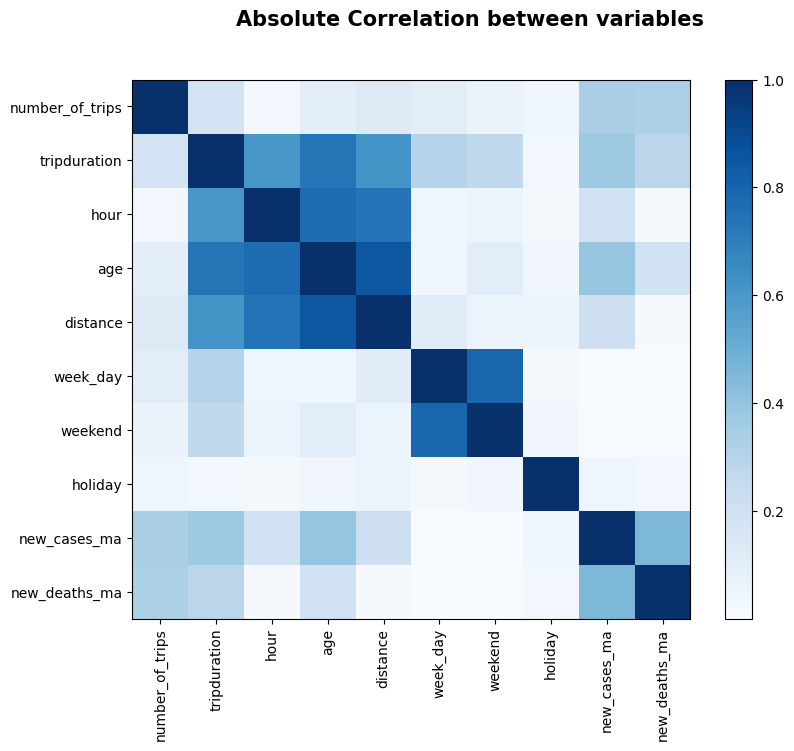

In [16]:
correlation_matrix = plot_all_correlations(trips_and_covid)

## COVID-19 cases

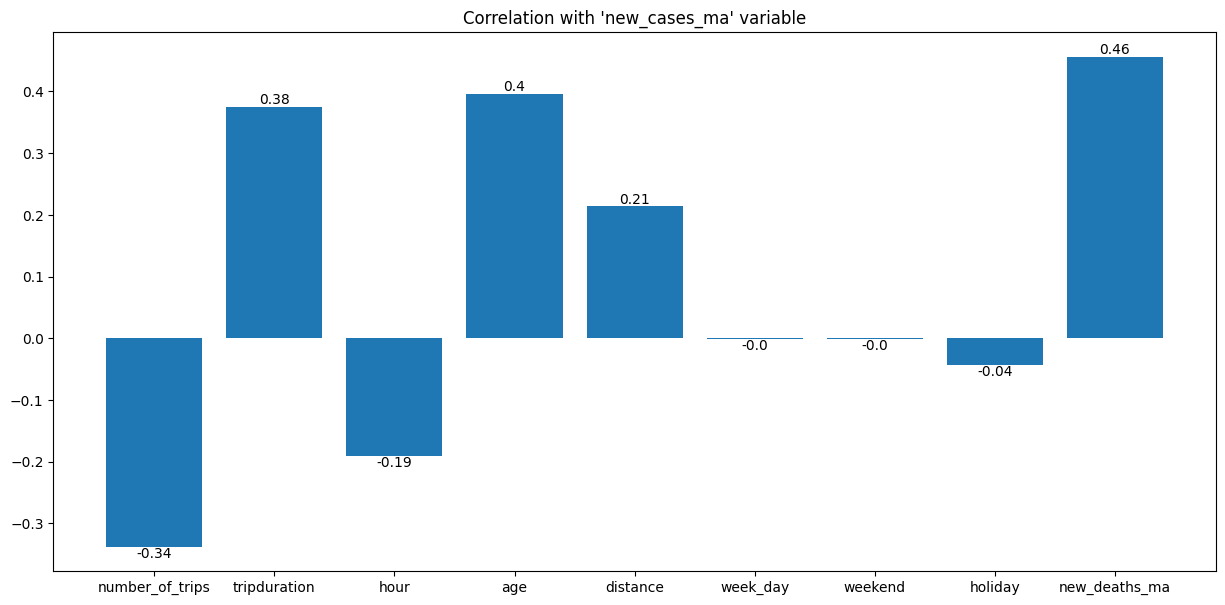

In [17]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_cases_ma',
                                                             without_outliers = without_outliers)

## COVID-19 deaths

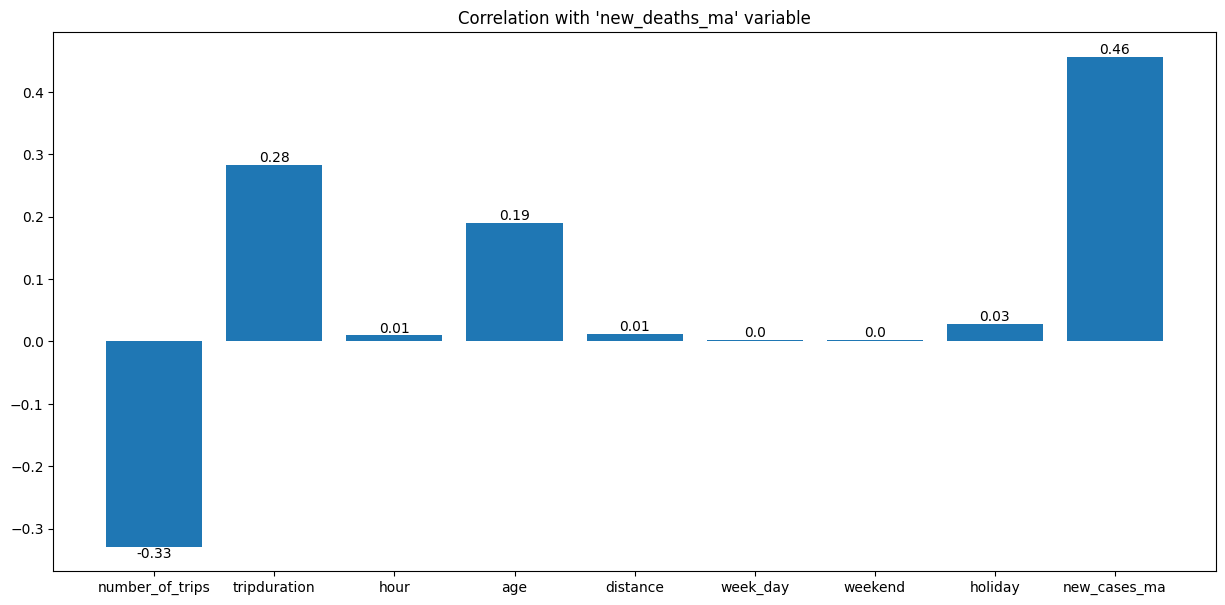

In [18]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_deaths_ma',
                                                             without_outliers = without_outliers)

In [19]:
trips_and_covid.loc['2020-03-24']

number_of_trips    4107.000000
tripduration       1799.565863
hour                 14.611882
age                  28.482313
distance           1583.754006
week_day              1.000000
weekend               0.000000
holiday               0.000000
new_cases_ma        275.000000
new_deaths_ma         6.000000
Name: 2020-03-24 00:00:00, dtype: float64

### Plot together

In [20]:
def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
    ax = trips_and_covid_plot.plot(secondary_y = covid_variable, ylim=(0,None))
    plt.ylim(bottom=0)
    title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title)
    ax.axvline('2020-03-24', color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline('2020-05-27', color="purple", linestyle="--",  label='Plano SP de retomada consciente')
    ax.axvline('2020-10-06', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2020-11-30', color="yellow", linestyle="--",  label='Fase Amarela')
    ax.axvline('2021-03-15', color="red", linestyle="--",  label='Fase Emergencial')
    ax.axvline('2021-08-17', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2021-11-01', color="m", linestyle="--",  label='Fim das restrições')
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
    if without_outliers:
        filename = variable + '_vs_'+ covid_variable+'_without_ouliers.png'
    else:
        filename = variable + '_vs_'+ covid_variable+'.png'
    plt.savefig(destination_folder_path + 'versus_covid/'+filename)

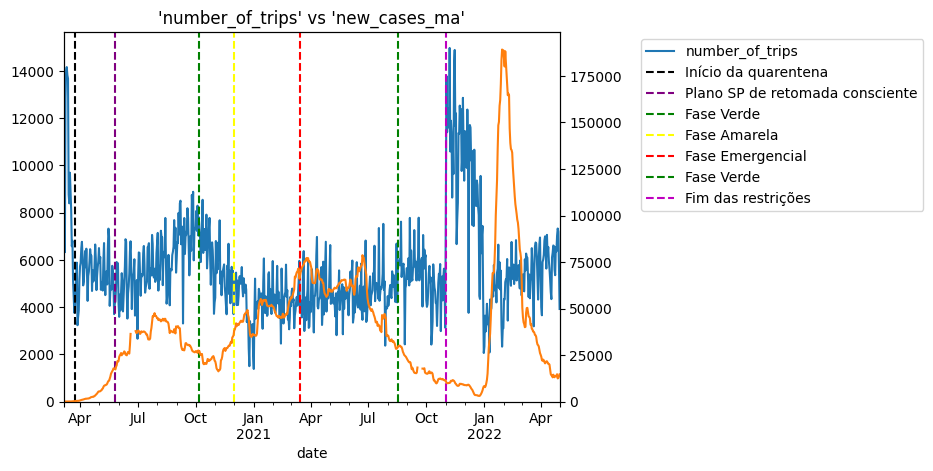

In [21]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

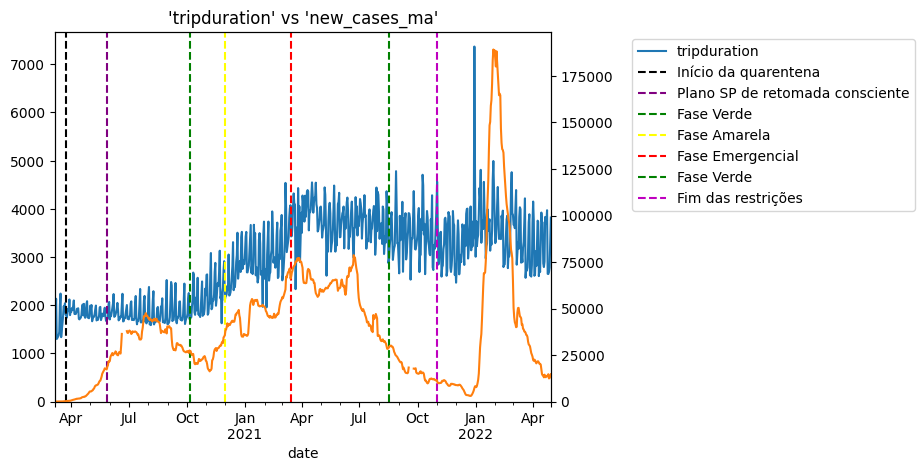

In [22]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

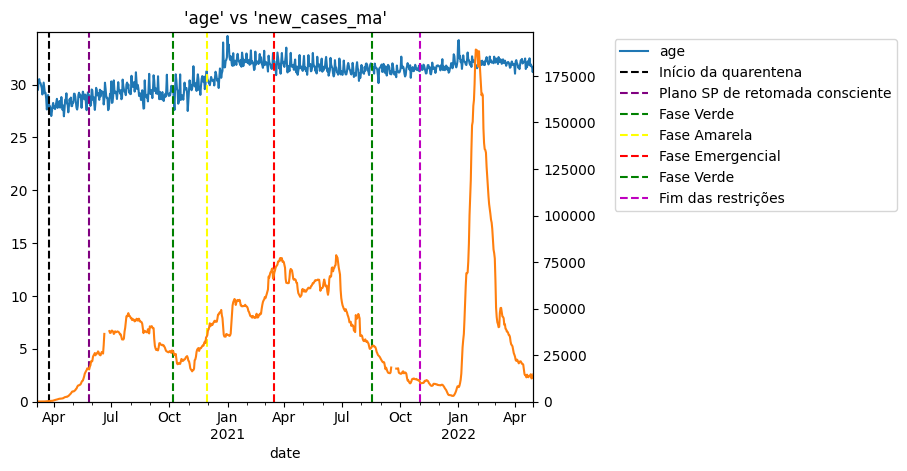

In [23]:
variable = 'age'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

<AxesSubplot:xlabel='date'>

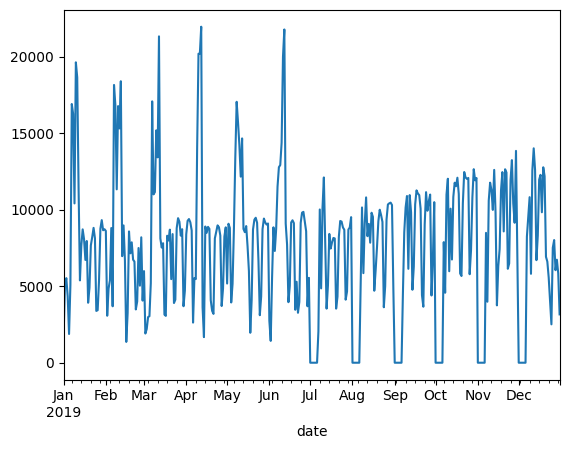

In [29]:
trips['number_of_trips']['2019'].plot()

<AxesSubplot:xlabel='date'>

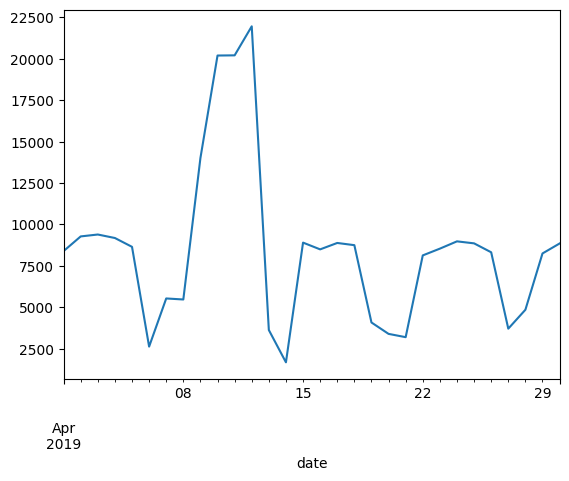

In [30]:
trips['number_of_trips']['2019-04'].plot()

<AxesSubplot:xlabel='date'>

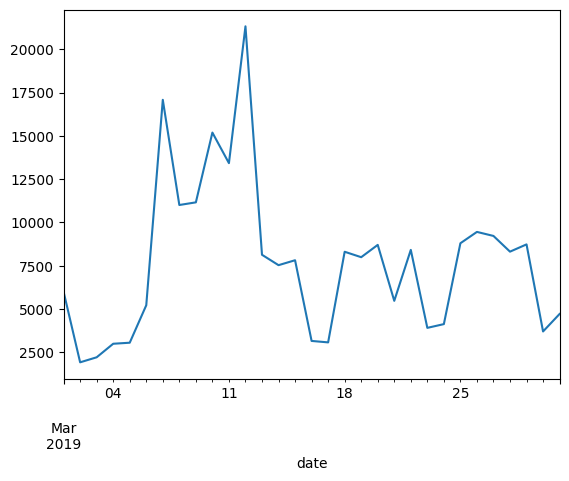

In [31]:
trips['number_of_trips']['2019-03'].plot()

<AxesSubplot:xlabel='date'>

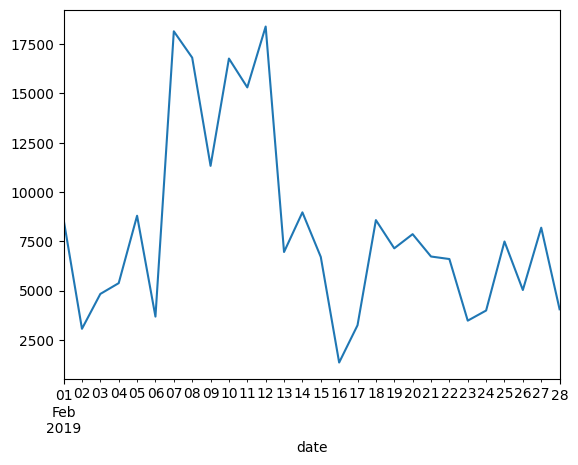

In [32]:
trips['number_of_trips']['2019-02'].plot()

<AxesSubplot:xlabel='date'>

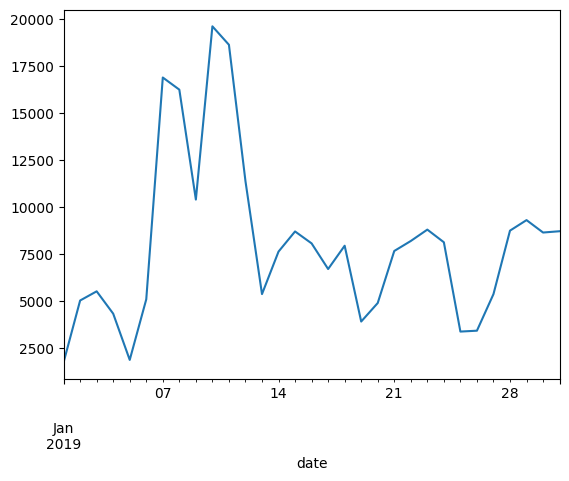

In [33]:
trips['number_of_trips']['2019-01'].plot()

<AxesSubplot:xlabel='date'>

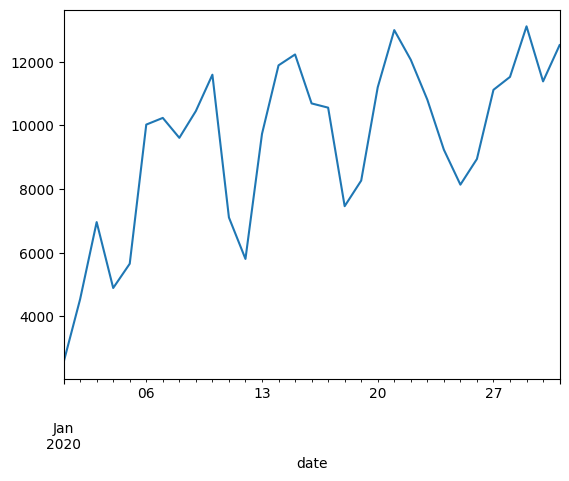

In [34]:
trips['number_of_trips']['2020-01'].plot()

<AxesSubplot:xlabel='date'>

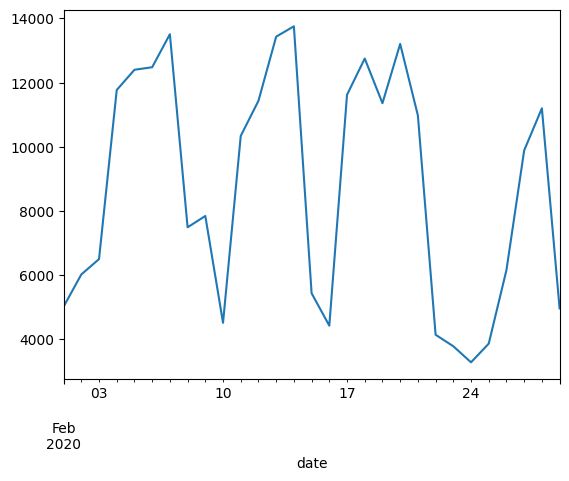

In [35]:
trips['number_of_trips']['2020-02'].plot()